In [1]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
# 가위 resize 

import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 resize 

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [253]:
# 보 resize 

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [300]:
#  3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

import numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


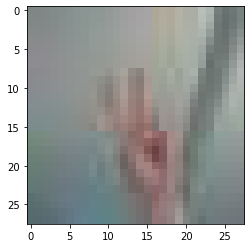

In [301]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [302]:
"""
# 딥러닝 네트워크 설계하기

import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='softsign', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()
"""

"\n# 딥러닝 네트워크 설계하기\n\nimport tensorflow as tf\nfrom tensorflow import keras\nimport numpy as np\n\n# model을 직접 만들어 보세요.\n# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?\nmodel=keras.models.Sequential()\nmodel.add(keras.layers.Conv2D(16, (3,3), activation='softsign', input_shape=(28,28,3)))\nmodel.add(keras.layers.MaxPool2D(2,2))\nmodel.add(keras.layers.Conv2D(32, (3,3), activation='relu'))\nmodel.add(keras.layers.MaxPooling2D((2,2)))\nmodel.add(keras.layers.Flatten())\nmodel.add(keras.layers.Dense(32, activation='relu'))\nmodel.add(keras.layers.Dense(10, activation='softmax'))\n\nprint('Model에 추가된 Layer 개수: ', len(model.layers))\nmodel.summary()\n"

In [311]:
# 딥러닝 네트워크 설계하기

import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='softsign', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='softsign'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='softsign'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_63 (Dense)             

In [312]:
# 딥러닝 네트워크 학습시키기

# model을 학습시키는 코드를 직접 작성해 보세요.
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [313]:
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=14)

Epoch 1/14
10/10 [==============================] - 0s 3ms/step - loss: 1.1559 - accuracy: 0.3400
Epoch 2/14
10/10 [==============================] - 0s 3ms/step - loss: 1.1120 - accuracy: 0.3467
Epoch 3/14
10/10 [==============================] - 0s 3ms/step - loss: 1.0862 - accuracy: 0.3600
Epoch 4/14
10/10 [==============================] - 0s 3ms/step - loss: 1.0572 - accuracy: 0.4067
Epoch 5/14
10/10 [==============================] - 0s 3ms/step - loss: 0.9945 - accuracy: 0.7300
Epoch 6/14
10/10 [==============================] - 0s 3ms/step - loss: 0.9330 - accuracy: 0.7300
Epoch 7/14
10/10 [==============================] - 0s 3ms/step - loss: 0.8865 - accuracy: 0.6833
Epoch 8/14
10/10 [==============================] - 0s 3ms/step - loss: 0.7643 - accuracy: 0.8433
Epoch 9/14
10/10 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.8967
Epoch 10/14
10/10 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.8800
Epoch 11/14
10/10 [

In [314]:
# test 데이터 resize
    # 가위
def resize_images(img_path):
    images=glob.glob(img_path + "/scissor/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [315]:
# 바위
def resize_images(img_path):
    images=glob.glob(img_path + "/rock/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [316]:
# 보
def resize_images(img_path):
    images=glob.glob(img_path + "/paper/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [317]:
# 얼마나 잘 만들었는지 확인하기(테스트)
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [318]:
# test 정확도 측정하기

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.6684 - accuracy: 1.0000
test_loss: 0.6684040427207947 
test_accuracy: 1.0


In [324]:
!git init

Initialized empty Git repository in /aiffel/aiffel/exploration/.git/


In [326]:
!git add .

hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> Aiffel
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached Aiffel
hint: 
hint: See "git help submodule" for more information.


In [329]:
!git submodule add https://github.com/hotsun1508/Aiffel.git Aiffel

'Aiffel' already exists in the index


In [330]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .ipynb_checkpoints/rock_scissor_paper_classifier-checkpoint.ipynb
	new file:   .ipynb_checkpoints/rock_scissor_paper_classifier_final-checkpoint.ipynb
	new file:   Aiffel
	new file:   rock_scissor_paper_classifier.ipynb
	new file:   rock_scissor_paper_classifier_final.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   rock_scissor_paper_classifier.ipynb



In [334]:
!git config --global user.name "hotsun1508"
!git config --global user.email "sunaslight1508@gmail.com"

In [335]:
!git init

Reinitialized existing Git repository in /aiffel/aiffel/exploration/.git/


In [336]:
!git commit -m "rock scissor paper project"

[master (root-commit) b56dade] rock scissor paper project
 5 files changed, 2652 insertions(+)
 create mode 100644 .ipynb_checkpoints/rock_scissor_paper_classifier-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/rock_scissor_paper_classifier_final-checkpoint.ipynb
 create mode 160000 Aiffel
 create mode 100644 rock_scissor_paper_classifier.ipynb
 create mode 100644 rock_scissor_paper_classifier_final.ipynb


In [340]:
!git remote add origin https://github.com/hotsun1508/Aiffel.git

fatal: remote origin already exists.


In [ ]:
!git push origin master